In [1]:
from matplotlib.image import imread 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import glob
import os
import skimage as ski

import warnings
warnings.filterwarnings("ignore")

date = "20220710"
name_of_file = f"./Images/Final/{date}.png"

num_clusters = 9

In [2]:
files = glob.glob("./Images/Final/*.png")
print(files)

['./Images/Final\\20220615.png', './Images/Final\\20220625.png', './Images/Final\\20220708.png', './Images/Final\\20220710.png', './Images/Final\\20220720.png', './Images/Final\\20220729.png', './Images/Final\\20220813.png', './Images/Final\\20220828.png']


In [3]:
# ----- Read filtered file -----

image = imread(name_of_file)


image.shape

# image is represented in 3d matrix
# first val is height
# second val is width'
# third val is # of color channels (RGBA)

(1375, 2115, 4)

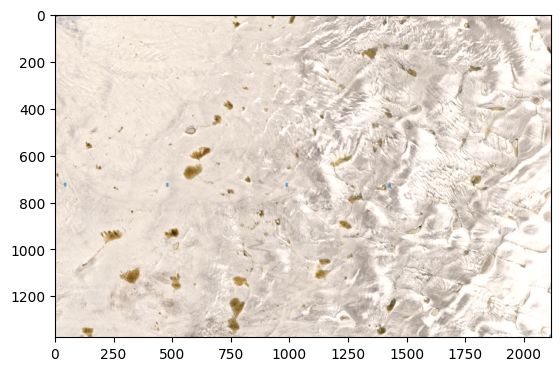

In [4]:
plt.imshow(image)

In [5]:
X = image.reshape(-1,4)

In [6]:
X.shape

(2908125, 4)

In [7]:
# K-means clustering
from sklearn.cluster import KMeans

In [8]:
# Create n clusters of colors
kmeans = KMeans(n_clusters = num_clusters).fit(X)

In [9]:
kmeans.cluster_centers_

array([[0.9361606 , 0.8905966 , 0.8491001 , 1.        ],
       [0.8008435 , 0.7481964 , 0.708662  , 1.        ],
       [0.66687274, 0.58944243, 0.4796543 , 1.        ],
       [0.9723449 , 0.9304629 , 0.8890755 , 1.        ],
       [0.85529184, 0.8052405 , 0.76637757, 1.        ],
       [0.7322921 , 0.676667  , 0.63400406, 1.        ],
       [0.8994678 , 0.8519918 , 0.8123939 , 1.        ],
       [0.55492115, 0.44116694, 0.24680185, 1.        ],
       [0.99958956, 0.9917046 , 0.96935177, 1.        ]], dtype=float32)

In [10]:
kmeans.labels_


array([5, 2, 2, ..., 5, 5, 5])

In [11]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

In [12]:
segmented_image

array([[0.7322921 , 0.676667  , 0.63400406, 1.        ],
       [0.66687274, 0.58944243, 0.4796543 , 1.        ],
       [0.66687274, 0.58944243, 0.4796543 , 1.        ],
       ...,
       [0.7322921 , 0.676667  , 0.63400406, 1.        ],
       [0.7322921 , 0.676667  , 0.63400406, 1.        ],
       [0.7322921 , 0.676667  , 0.63400406, 1.        ]], dtype=float32)

[0.9361606 0.8905966 0.8491001 1.       ]
[0.8008435 0.7481964 0.708662  1.       ]
[0.66687274 0.58944243 0.4796543  1.        ]
[0.9723449 0.9304629 0.8890755 1.       ]
[0.85529184 0.8052405  0.76637757 1.        ]
[0.7322921  0.676667   0.63400406 1.        ]
[0.8994678 0.8519918 0.8123939 1.       ]
[0.55492115 0.44116694 0.24680185 1.        ]
[0.99958956 0.9917046  0.96935177 1.        ]
{0: [0.9361606, 0.8905966, 0.8491001, 1.0], 1: [0.8008435, 0.7481964, 0.708662, 1.0], 2: [0.66687274, 0.58944243, 0.4796543, 1.0], 3: [0.9723449, 0.9304629, 0.8890755, 1.0], 4: [0.85529184, 0.8052405, 0.76637757, 1.0], 5: [0.7322921, 0.676667, 0.63400406, 1.0], 6: [0.8994678, 0.8519918, 0.8123939, 1.0], 7: [0.55492115, 0.44116694, 0.24680185, 1.0], 8: [0.99958956, 0.9917046, 0.96935177, 1.0]}
[(7, [0.55492115, 0.44116694, 0.24680185, 1.0]), (2, [0.66687274, 0.58944243, 0.4796543, 1.0]), (5, [0.7322921, 0.676667, 0.63400406, 1.0]), (1, [0.8008435, 0.7481964, 0.708662, 1.0]), (4, [0.85529184, 0.80

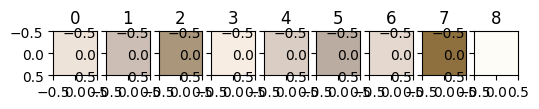

In [13]:
color = list(kmeans.cluster_centers_[3][:3])
plt.figure(figsize=(6, 4))
for i, color in enumerate(list(kmeans.cluster_centers_)):
    plt.subplot(1, num_clusters, i+1)
    plt.title(f"{i}")
    print(color)
    plt.imshow([[color[:3]]])


hash = {}
for index, color in enumerate(list(kmeans.cluster_centers_)):
    hash[index] = list(color)
print(hash)


sorted_hash = sorted(hash.items(), key = lambda x: x[1][0], reverse = False)
print(sorted_hash)


In [14]:
segmented_image = segmented_image.reshape(image.shape)

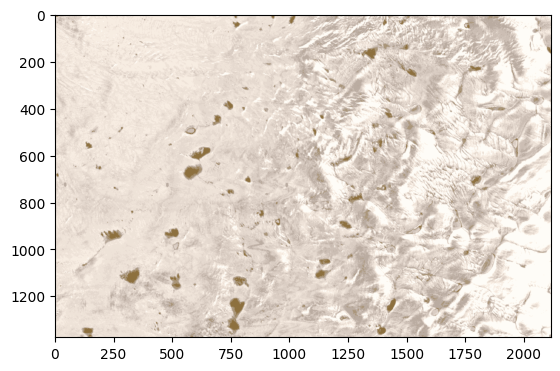

In [15]:
#ski.io.imsave(f'./Images/Final/Classified/{date}.png', segmented_image.astype(np.uint8))
segmented_image_pil = Image.fromarray((segmented_image * 255).astype(np.uint8))
segmented_image_pil.save(f'./Images/Final/Classified/{date}.png')
plt.imshow(segmented_image)

In [16]:
kmeans.inertia_

3555.179931640625

In [17]:
# from sklearn.metrics import silhouette_score

## Calculate Silhouette score
# silhouette_score(X, kmeans.labels_)

In [18]:
from collections import Counter

labels = kmeans.labels_
print(labels)
counts = Counter(labels)
print(counts)

[5 2 2 ... 5 5 5]
Counter({0: 656142, 6: 560766, 4: 408690, 3: 391672, 8: 357045, 1: 289419, 5: 168672, 2: 49334, 7: 26385})


In [19]:
# Determine whether there are unknown regions
r = sorted_hash[0][1][0]
g = sorted_hash[0][1][1]
b = sorted_hash[0][1][2]

marked = False
if r < 0.03 and g < 0.03 and b < 0.03:
    print("Unkown region")
    marked = True
elif r < 0.4:
    print("Blue Region marked")
    marked = True

res = 0
if marked:
    res = sorted_hash[1]
    print(res)
else:
    res = sorted_hash[0]
    print(res)

print("\n")
print(res[1])
adjusted = [num*255 for num in res[1]]
print(adjusted)

#8: [0.8356781, 0.69695234, 0.45043454, 1.0]
#6, [0.8686114, 0.7681121, 0.54014146, 1.0]
#5: [0.70263934, 0.653798, 0.48757416, 1.0]
#3: [0.7471523, 0.6184294, 0.3196752, 1.0]
# 3: [0.55284584, 0.438667, 0.24367201, 1.0]
#3: [0.6219741, 0.50263584, 0.245381, 1.0]
#8: [0.5366771, 0.3496021, 0.017388225, 1.0]
#3: [0.5475606, 0.28559738, 0.0004876256, 1.0]
# 5: [0.61819816, 0.3446235, 0.028822064, 1.0]


(7, [0.55492115, 0.44116694, 0.24680185, 1.0])


[0.55492115, 0.44116694, 0.24680185, 1.0]
[141.50489330291748, 112.49756902456284, 62.93447256088257, 255.0]


Text(0.5, 1.0, '1250-1400')

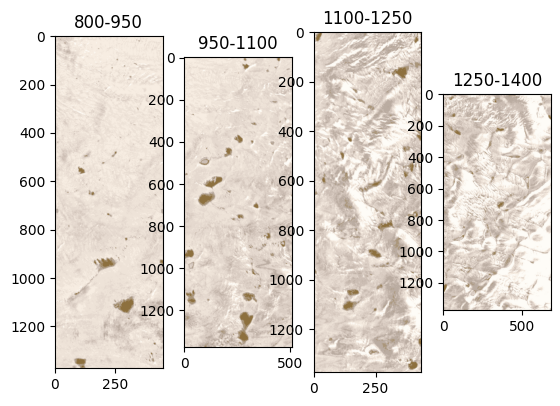

In [20]:
# - Split the image into respective sections -
image = Image.open(f"./Images/Final/Classified/{date}.png")

width, height = image.size

# Define the coordinates for the vertical lines
line1 = width / 4.4
line2 = width / 2.13
line3 = width / 1.48

# Split the image into four regions
region1 = image.crop((35, 0, line1, height))
region2 = image.crop((line1, 0, line2, height))
region3 = image.crop((line2, 0, line3, height))
region4 = image.crop((line3, 0, width, height))

# image_array = np.array(image)

# # Reshape the image array to a 1D array of pixels
# pixels = image_array.reshape(-1, image_array.shape[-1])

# # Find the unique pixels
# unique_pixels = np.unique(pixels, axis = 0)

# # Print the RGB values of each unique pixel
# for i, pixel in enumerate(unique_pixels):
#     print("Pixel", i+1, "RGB:", pixel)
plt.subplot(1, 4, 1)
plt.imshow(region1)
plt.title("800-950")

plt.subplot(1,4,2)
plt.imshow(region2)
plt.title("950-1100")

plt.subplot(1,4,3)
plt.imshow(region3)
plt.title("1100-1250")

plt.subplot(1,4,4)
plt.imshow(region4)
plt.title("1250-1400")

In [21]:
def create_table():
    df = pd.DataFrame(columns = ["Year", "X", "Y", "Type", "Bands"])
    dir = "./kmeans_table.csv"
    if os.path.exists(dir): 
        return
    else:
        print("Creating table...")
        df.to_csv(directory, index = False)

In [22]:
def save_table(obj, year, method, bands):
    create_table()
    new_obj = {"X": obj.keys(),
               "Y": obj.values(),
               "Year": year,
               "Type": method, 
               "Bands": bands
              }
    df = pd.DataFrame(new_obj)
    temp = df.to_csv("./temp.csv", index = False)
    print("Appending")
    existing_df = pd.read_csv("./kmeans_table.cv")
    new_df = pd.read_csv("./temp.csv")

    existing_df = pd.concat([existing_df, new_df], ignore_index = True)
    existing_df = existing_df.drop_duplicates()

    existing_df.to_csv("./kmeans_table.csv", index = False)